# 1. Intro & Recap: Networks of neurons and their synapses

### Outline

- recap of rate and spiking neurons
- synapses in rate networks
- synapses in spiking networks: current-based (CUBA) and conductance-based (COBA)
- implementing CUBA and COBA synapses

## Recap: Rate-based and spiking neurons

We have encountered two ways to model neurons:

* **rate neurons**: model the firing rate using an activity variable
$$ \tau \frac{dr}{dt} = -r + I  \tag{1}$$

* **spiking neurons**: model the membrane potential and spikes explicitly (
e.g. LIF)
$$ \tau_m \frac{dV}{dt} = -(V-E_L) + \frac{I}{g_L} \tag{2}$$

In both cases, $I$ describes the input the model neuron receives through synapses from other neurons.

We can capture this with some constant or noisy input.

But if we want to model a network, we need to consider the individual synapses between neurons in the network too. We often split the input into synaptic and external input: $I = I_{syn} + I_{ext}$

## Recap: Synapses

<div>
<img src="https://images.squarespace-cdn.com/content/v1/5bee2e5d2714e52916f4d54c/1584382852320-2MIWR0EBGXHLZNCJIHB8/hebbs+law+neuron+neuroplasticity" width="600">
</div>

<div>
<img src="https://github.com/LNaumann/tutorial_plasticity/blob/main/images/syn-transmission.png?raw=true" width="600">
</div>

## 1.1 Synapses in rate networks

Lets start with the easier case. In rate networks, synapses are typically modelled as only a weight $w$ between the neurons. This means that $I_{syn}$ looks like this:
$$ I_{syn} = ∑_{j=1}^{N} w_j r_j \tag{3}$$
Where $r_j$ is the firing rate of input neuron $j$ and $w_j$ the weight (i.e. connection strength) from that neuron. To get the total input, we sum over all $N$ input neurons.

<div>
<img src="https://github.com/LNaumann/tutorial_plasticity/blob/main/images/rate_inputs.jpeg?raw=true" width="400">
</div>

---

❓Question: How can we distinguish between excitatory and inhibitory synapses?

---

That's it. Rate neurons really aren't complicated. But they can still do a lot, so stay tuned!


## 1.2 Synapses in spiking networks

There are two main types of synapse models for spiking networks:
* conductance-based synapses (COBA)
* current-based synapses (CUBA)

### Conductance-based synapses (COBA)

You have actually seen these in Chris' tutorial, but let's do a quick recap.

---

❓Question: What are the main transmitter-activated channels at synapses?

---

The input current generated by a channel $X$ (AMPA, NMDA or GABA) can be written as
$$ I_{X} = -g_{X}(t) (V(t) - E_{X}) \ , \tag{4}$$
where $g_{X}(t)$ is the time-dependent conductance through channel $X$, $V(t)$ the neuron's membrane potential and $E_{X}$ is the reversal potential of the channel.

The conductance $g_X(t)$ is modelled as a pulse increase followed by exponential decay:
$$g_{X}(t) = \sum_j w_j \sum_{spike} e^{(t-t^{spike})/\tau_{X}} \Theta (t-t^{spike}) \tag{5}$$
We sum all contributions of all input spikes $t^{spike}$ from all other neurons $j$.
The weight $w_j$ determines the peak conductance for each input and $\tau_{X}$ is the time constant of the channel.

😰 **Phew, that's a pretty complicated equation.** Don't worry, there's a more intuitive way to write it.

We can write the time-course of the conductance as a differential equation instead of the solution:
$$ \tau_{X} \frac{dg_{X}}{dt} = - g_{X} + \sum_{j} w_{j} S_j(t) \tag{6}$$

$S_j(t)$ are the spike trains, which are 1 at all spike times and otherwise zero. When there is a spike $g_X$ increases by $w_j$ and otherwise it decays to zero.

---

❓Question: How do we capture if a synapse is excitatory or inhibitory?

---

We will focus on the fast (ionotropic) channels AMPA and GABA. So let's put all of our synaptic input together:

$$ I_{syn} = I_{AMPA} + I_{GABA} \tag{7}$$

with the currents

$$ I_{AMPA} = -g_{AMPA}(t) (V(t) - E_{AMPA}) \tag{8a}$$
$$ I_{GABA} = -g_{GABA}(t) (V(t) - E_{GABA}) \tag{8b}$$

and the conductances

$$ \tau_{AMPA} \frac{dg_{AMPA}}{dt} = - g_{AMPA} + \sum_{j} w_{j} S_j(t) \tag{9a} $$
$$ \tau_{GABA} \frac{dg_{AMPA}}{dt} = - g_{GABA} + \sum_{j} w_{j} S_j(t) \tag{9b} $$


### Current-based synapses (CUBA)



For current-based synapses we assume that the current is independent of the membrane potential, which makes everything a lot simpler (yay!). We just say that the input current increases with input spikes and otherwise decays:

$$ I_{X} = \sum_j w_j \sum_{spike} e^{(t-t^{spike})/\tau} \Theta (t-t^{spike}) \tag{10} $$

$X$ is again AMPA or GABA and as for the COBA synapses, we will sum their contribution as in Eq. (7).

Note that this looks veeeery familiar to the equation for conductances above, but now it's directly for the current. And again we can just write this as a differential equation.

---

❓Question: How can we write this as a differential equation?

---

❓ Question: How do we distinguish between excitatory and inhibitory synapses?

---


## 1.3 Comparing COBA and CUBA synapses

We've seen a lot of equations for COBA and CUBA synapses so now it's time to build some intuitions.

---

🟦 **Exercise 1.1: Compare the influence of input spikes on the input current and membrane potential of a neuron for COBA and CUBA synapses.**

We will focus on one single excitatory synapse so you only need one model neuron receiving inputs from one spike train.

Follow these steps:

1. Review the implementation of a LIF below. You can run the code but the synapse will not transmit the spike input.
2. Implement conductance-based synapses.
3. Implement current-based synapses.
4. Simulate your COBA and CUBA LIF for an input spike train.
5. Visualise and compare the membrane potentials and input currents for the two models.

You can take inspiration from the code of previous tutorials.

**Already done?** Here's some additional exercises you can do:
- make the CUBA and/ or the COBA synapse inhibitory
- include an excitatory *and* an inhibitory synapse
- play with the magnitude of the synaptic weight $w$
- play with the timescale of the synapse $\tau_\mathrm{AMPA}$

In [ ]:
# @title Imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# @title Parameters

params = {
          'tau_m':      10.,  # membrane time constant (ms)
          'E_L':       -75.,  # resting membrane potential (mV)
          'g_L':        10.,  # leak conductance (nS)
          'V_th':      -55.,  # spiking threshold potential (mV)
          'V_reset':   -75.,  # reset membrane potential (mV)
          'tau_ref':     2.,  # refractory period (ms)
          'tau_AMPA':   10.,  # AMPA synaptic time constant (ms)
          'E_AMPA':      0.,  # AMPA reversal potential (mV)
          'w_COBA':     0.3,  # synaptic weight for COBA synapse (nS)
          'w_CUBA':      20,  # synaptic weight for CUBA synapse (pA)
          'dt':         0.1,  # integration time step (ms)
}

In [ ]:
# @title LIF neuron, CUBA and COBA synapses

def I_syn_CUBA(I_AMPA, spike, w, tau_AMPA, dt):
  """
  Compute the next value of the synaptic (AMPA) current for current-based (CUBA)
  synapse.

  Args:
  - I_AMPA (float): previous value of synaptic AMPA current (pA)
  - spike (bool): presence (1) or absence (0) of spike in time bin
  - w (float): synaptic strength of the synapse (pA)
  - tau_AMPA (float): time scale of synapse (ms)
  - dt (float): integration time step (ms)

  Returns:
  - I_AMPA_new (float): next value for synaptic current
  """

  ### YOUR SOLUTION BELOW >>>

  I_AMPA_new = I_AMPA # this is wrong and won't work, edit / remove

  ### <<< YOUR SOLUTION ABOVE

  return I_AMPA_new


def I_syn_COBA(I_AMPA, g_AMPA, V, E_AMPA, spike, w, tau_AMPA, dt):
  """
  Compute the next value of the synaptic (AMPA) current and the conductance
  for conductance-based (COBA) synapse.

  Args:
  - I_AMPA (float): previous value of synaptic AMPA current (pA)
  - g_AMPA (float): previous value of synaptic conductance (nS)
  - V (float): current value of membrane potential (mV)
  - E_AMPA (float): reversal potential of AMPA current (mV)
  - spike (bool): presence (1) or absence (0) of spike in time bin
  - w (float): synaptic strength of the synapse (pA)
  - tau_AMPA (float): time scale of synapse (ms)
  - dt (float): integration time step (ms)

  Returns:
  - I_AMPA_new (float): next value for synaptic current
  - g_AMPA_new (float): next value for synaptic conductance
  """

  ### YOUR SOLUTION BELOW >>>

  # get new current
  I_AMPA_new = I_AMPA # this is wrong and won't work, edit / remove

  # get new conductance
  g_AMPA_new = g_AMPA # this is wrong and won't work, edit / remove

  ### <<< YOUR SOLUTION ABOVE

  return I_AMPA_new, g_AMPA_new


def dvdt_LIF(g_L, E_L, tau_m, I, V, I_ext=0):
    """
    Compute change in membrane potential for Euler integration step:

    Args:
    - g_L (float): leak conductance (nS)
    - E_L (float): resting membrane potential (mV)
    - tau_m (float): membrane time constant (ms)
    - I (float): input current (pA)
    - V (float): current value of membrane potential (mV)
    - I_ext (float): external input current, default is 0 (pA)

    Returns:
    - dvdt (float): change in membrane potential
    """

    dvdt = (-(V-E_L) + I/g_L + I_ext/g_L)/tau_m
    return(dvdt)


def simulate_LIF(T, params, input_spikes, syn_type='CUBA'):
    """
    Simulate LIF model for a duration T that receives input spikes through a
    current-based or conductance-based synapse.

    Args:
    - T (float): duration of simulation (ms)
    - params (dict): parameters for LIF model
    - input spikes (boolean array): input spike train
    - syn_type (str): type of synapse ('COBA' or 'CUBA')

    Returns:
    - V (ndarray): membrane potential for all simulations steps
    - t (ndarray): time at each step (ms)
    - rec_spikes (ndarray): recorded spikes of LIF neuron (0 or 1 for each step)
    - I_rec (ndarray): input current of LIF neuron for each step
    """

    # Initialize parameters from the parameter dictionary
    g_L = params['g_L']
    E_L = params['E_L']
    V_th = params['V_th']
    V_reset = params['V_reset']
    tau_m = params['tau_m']
    tref = params['tau_ref']
    tau_AMPA = params['tau_AMPA']
    E_AMPA = params['E_AMPA']
    w_COBA = params['w_COBA']
    w_CUBA = params['w_CUBA']
    dt  = params['dt']

    # Initialize variables
    t = np.arange(0, T, dt)
    V = np.zeros_like(t)
    V[0] = E_L
    I_syn = 0
    g_AMPA = 0 # will only be needed for COBA

    I_rec = [I_syn]

    # Step through system and integrate in time
    rec_spikes = []  # record spike times
    tr = 0.  # the count for refractory duration

    spike_id = 0
    next_spike = input_spikes[spike_id]

    for k in range(1, len(t)):
        if tr > 0:  # check if in refractory period
            V[k-1] = V_reset  # set voltage to reset
            tr = tr - 1 # reduce running counter of refractory period

        elif V[k-1] >= V_th:  # if voltage over threshold
            rec_spikes.append(k)  # record spike event
            V[k-1] = V_reset  # reset voltage
            tr = tref / dt  # set refractory time

        # compute synaptic input
        if syn_type == 'CUBA': # conductance-based synapse
          I_syn = I_syn_CUBA(I_syn, input_spikes[k-1], w_CUBA, tau_AMPA, dt)
        elif syn_type == 'COBA': # current-based synapse
          I_syn, g_AMPA = I_syn_COBA(I_syn, g_AMPA, V[k-1], E_AMPA, input_spikes[k-1],
                                     w_COBA, tau_AMPA, dt)
        else:
          print('Invalid synapse type!')
          break

        # for each point in time, compute dvdt from V[k-1]
        dvdt = dvdt_LIF(g_L, E_L, tau_m, I_syn, V[k-1])

        # update V based on V[k-1] and dvdt
        V[k] = V[k-1] + dvdt*dt

        # record synapti input
        I_rec.append(I_syn)

    return V, t, rec_spikes, I_rec

In [ ]:
# @title Helper function for Poisson spike trains

def generate_spike_train_bool(rate, T, dt):
    """
    Generate an array of spikes. Each time bin denotes whether there is a spike
    (True) or not (False).

    Args:
    - rate (float): firing rate of input spike train (Hz)
    - T (float): duration of spike train (ms)
    - dt (float): size of time bins

    Returns:
    - spike_train_boool (ndarray): boolean array of spike times
    """

    num_bins = int(T / dt)
    spike_train_bool = np.zeros(num_bins, dtype=bool)

    # for each time bin, compute the probability of a spike using the rate and
    # draw a spike according to the Poisson distribution
    for bin_idx in range(num_bins):
        spike_prob = 1 - np.exp(-rate * dt)
        spike_train_bool[bin_idx] = np.random.rand() < spike_prob

    return spike_train_bool

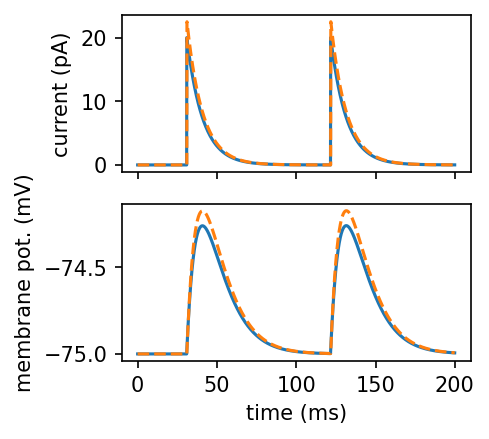

In [ ]:
# @title Running simulation and plotting

T = 200
input_spikes = generate_spike_train_bool(10, T/1000, params['dt']/1000)

# run LIF with CUBA
V_CUBA, t, rec_spikes_CUBA, I_rec_CUBA = simulate_LIF(T, params, input_spikes, syn_type='CUBA')
V_COBA, t, rec_spikes_COBA, I_rec_COBA = simulate_LIF(T, params, input_spikes, syn_type='COBA')

# plot results
fig, ax = plt.subplots(2, 1, figsize=(3, 3), dpi=150, sharex=True)
ax[0].plot(t, I_rec_CUBA)
ax[0].plot(t, I_rec_COBA, ls='--')
ax[1].plot(t, V_CUBA)
ax[1].plot(t, V_COBA, ls='--')
ax[0].set(ylabel='current (pA)')
ax[1].set(xlabel='time (ms)', ylabel='membrane pot. (mV)')
plt.show()

---
❓Questions:
- What is the difference between the COBA and CUBA synapse? How does their behaviour depend on parameters like the synaptic weights? How would you expect CUBA and COBA synapses to affect the network dynamics?
- What is good or bad about this impementation? Is it suitable for a larger network or longer simulations? Why and why not? Can you think of improvements?
---